# Regresja logistyczna

Regresja logistyczna jest algorytmem klasyfikacji uczenia maszynowego, który jest używany do przewidywania prawdopodobieństwa kategorycznej zmiennej zależnej. W regresji logistycznej, zmienna zależna jest zmienną binarną, która zawiera dane zakodowane jako 1 (tak, sukces, itp.) lub 0 (nie, porażka, itp.). Innymi słowy, model regresji logistycznej przewiduje P(Y=1) jako funkcję X.

Skoro w nazwie jest słowo regresja, to czemu ten model jest jednak algorytmem klasyfikacji? Regresja sama w sobie przewiduje prawdopodobieństwo przynależności do danej klasy, co samo w samo jest problemem regresji. Natomiast to prawdopodobienstwo jest zamieniane od pewnego progu np p>-0.5 dla klasę 1, oraz 0 w przeciwnym wypadku.



## Ważne informacje

- Używamy regresji logistycznej, aby wytrenować model do przewidywania między 2 klasami: Yes/No, Black/White, True/False. 
- Żadna zmienna zależna(**y**) nie powinna znajdować się wśród zestawu cech(**X**). Należy zbadać korelację pomiędzy cechami oddzielnie.
- Dane wejściowe(**X**) zostaną poddane normalizacji i standaryzacji.
Wyjściem regresji logistycznej jest zawsze log prawdopodobieństwa. 


In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, LabelBinarizer
from sklearn.pipeline import make_pipeline
from sklearn_pandas import DataFrameMapper
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from matplotlib.gridspec import GridSpec

from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, auc, accuracy_score, recall_score, precision_score

from sklearn import model_selection, tree, linear_model, neighbors, naive_bayes, ensemble
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from imblearn.over_sampling import SMOTE

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate


import numpy.random as npr
import scipy.stats as stats

# formulat interface to statsmodels (standard linear models)
import statsmodels.formula.api as smf

from scipy.cluster.vq import vq, kmeans
import matplotlib.patches as mpatches
from collections import defaultdict

from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn import preprocessing  # to normalise existing X

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
#titanic.csv
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

data = pd.read_csv(url)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Informacje o datasecie

In [ ]:
def dataframe_metainformation(df):
    meta = dict()
    descr = pd.DataFrame({'dtype': df.dtypes, 'NAs': df.isna().sum()})
    categorical_features = descr.loc[descr['dtype'] == 'object'].index.values.tolist()
    numerical_features = descr.loc[descr['dtype'] != 'object'].index.values.tolist()
    numerical_features_na = descr.loc[(descr['dtype'] != 'object') & (descr['NAs'] > 0)].index.values.tolist()
    categorical_features_na = descr.loc[(descr['dtype'] == 'object') & (descr['NAs'] > 0)].index.values.tolist()
    complete_features = descr.loc[descr['NAs'] == 0].index.values.tolist()
    meta['description'] = descr
    meta['categorical_features'] = categorical_features
    meta['categorical_features'] = categorical_features
    meta['categorical_features_na'] = categorical_features_na
    meta['numerical_features'] = numerical_features
    meta['numerical_features_na'] = numerical_features_na
    meta['complete_features'] = complete_features
    return meta

def print_metainformation(meta):
    print('Available types:', meta['description']['dtype'].unique())
    print('{} Features'.format(meta['description'].shape[0]))
    print('{} categorical features'.format(len(meta['categorical_features'])))
    print('{} numerical features'.format(len(meta['numerical_features'])))
    print('{} categorical features with NAs'.format(len(meta['categorical_features_na'])))
    print('{} numerical features with NAs'.format(len(meta['numerical_features_na'])))
    print('{} Complete features'.format(len(meta['complete_features'])))

In [ ]:
meta = dataframe_metainformation(data)
print_metainformation(meta)

Available types: [dtype('int64') dtype('O') dtype('float64')]
12 Features
5 categorical features
7 numerical features
2 categorical features with NAs
1 numerical features with NAs
9 Complete features


In [ ]:
#Uzupelnienie brakow przez mode

fill_mode = lambda col: col.fillna(col.mode().iloc[0])
data = data.apply(fill_mode, axis=0)

In [ ]:
#Sprawdzamy czy rzeczywiscie uzupelnilismy braki
meta = dataframe_metainformation(data)
print_metainformation(meta)

Available types: [dtype('int64') dtype('O') dtype('float64')]
12 Features
5 categorical features
7 numerical features
0 categorical features with NAs
0 numerical features with NAs
12 Complete features


Sprawdzamy zbalansowanie zmiennej przewidywanej

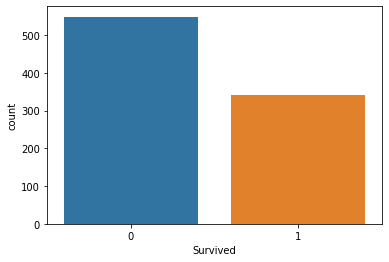

In [ ]:
sns.countplot(x='Survived', data=data);
plt.show();

In [ ]:
#kodowanie danych zmiennych kategorycznych - One hot encoding 

def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

In [ ]:
data_enc = encode_and_bind(data, "Sex")
data_enc

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,B96 B98,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,B96 B98,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,B96 B98,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",24.0,1,2,W./C. 6607,23.4500,B96 B98,S,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,0,1


In [ ]:
data_enc.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Sex_female       uint8
Sex_male         uint8
dtype: object

In [ ]:
X_selected = ["Pclass", "Age", "SibSp", "Parch", "Fare", "Sex_female", "Sex_male"]

# Selekcja zmiennych

### Recursive Feature Elimination
Recursive Feature Elimination (RFE) opiera się na idei wielokrotnego konstruowania modelu i wybierania cechy o najlepszych lub najgorszych wynikach, odkładania jej na bok i powtarzania procesu z pozostałymi cechami. Proces ten jest stosowany do momentu, gdy wszystkie cechy w zbiorze danych zostaną wyczerpane. Celem RFE jest wybór cech poprzez rekurencyjne rozpatrywanie coraz mniejszych zbiorów cech.

In [ ]:
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

X = data_enc[X_selected]
y = data_enc["Survived"]


logreg = LogisticRegression(solver='lbfgs', max_iter=250)
rfe = RFE(logreg, 5) #top 5
rfe = rfe.fit(X, y)

selectK_mask=rfe.get_support()
K_featnames = np.array(X_selected)[selectK_mask]
print("Wybrane kolumny", list(K_featnames))

Wybrane kolumny ['Pclass', 'SibSp', 'Parch', 'Sex_female', 'Sex_male']


In [58]:
#zad1
#dodaj do wybranych kolumn zmienna Embarked, zakoduj sa kodowaniem one-hot i sprawdz czy to zmieni wynik RFE
#masz jakies wnioski?


## Budowanie modelu



In [ ]:
# Używamy pakietu `statmodels`, ponieważ chcemy mieć łatwy dostęp do wszystkich wskaźników statystycznych, do których może prowadzić regresja logistyczna

In [60]:

X = data_enc[list(K_featnames)]
y = data_enc["Survived"]

logit_model=sm.Logit(y, X)
result=logit_model.fit(method='bfgs')
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.456833
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.314     
Dependent Variable: Survived         AIC:              824.0772  
Date:               2021-11-15 06:26 BIC:              848.0389  
No. Observations:   891              Log-Likelihood:   -407.04   
Df Model:           4                LL-Null:          -593.33   
Df Residuals:       886              LLR p-value:      2.3348e-79
Converged:          1.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Pclass        -0.9326    0.1069  -8.7271  0.0000  -1.1420  -0.7231
SibSp         -0.2258    0.0946  -2.3873  0.0170  -0.4112 

### P-Values and feature selection

Usuwamy zmienne p>0.05, jako nieistotne statystycznie



In [61]:
to_remove = result.pvalues[result.pvalues > 0.05].index.tolist()
X.drop(to_remove, inplace=True, axis=1)

logit_model=sm.Logit(y, X)
result=logit_model.fit(method='bfgs')
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.456833
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.314     
Dependent Variable: Survived         AIC:              824.0772  
Date:               2021-11-15 06:28 BIC:              848.0389  
No. Observations:   891              Log-Likelihood:   -407.04   
Df Model:           4                LL-Null:          -593.33   
Df Residuals:       886              LLR p-value:      2.3348e-79
Converged:          1.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Pclass        -0.9326    0.1069  -8.7271  0.0000  -1.1420  -0.7231
SibSp         -0.2258    0.0946  -2.3873  0.0170  -0.4112 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [62]:
#tak przefiltrowane dane możemy wrzucić do modelu

,Pclass,SibSp,Sex_female,Sex_male,Embarked_S
0,3,1,0,1,1
1,1,1,1,0,0
2,3,0,1,0,1
3,1,1,1,0,1
4,3,0,0,1,1
...,...,...,...,...,...
886,2,0,0,1,1
887,1,0,1,0,1
888,3,1,1,0,1
889,1,0,0,1,0


In [104]:
#logistyczna regresja

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=0)
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy on test: {:.2f}'.format(logreg.score(X_test, y_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy on test: 0.79
[[139  29]
 [ 26  74]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       168
           1       0.72      0.74      0.73       100

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.80      0.79      0.80       268



### ROC Curve

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

In [106]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

Plot the FPR vs. TPR, and the diagonal line representing the null model.

In [107]:
def plot_roc(fpr, tpr, logit_roc_auc):
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    # plt.savefig('Log_ROC')
    plt.show();

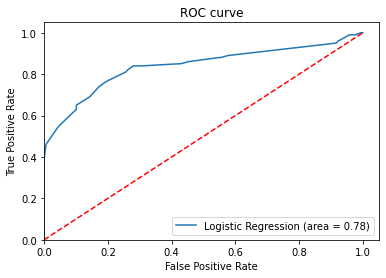

In [108]:
plot_roc(fpr, tpr, logit_roc_auc)

### Explore logit predictions

Szukamy optymalnego punktu odciecia

In [67]:
pred_proba_df = pd.DataFrame(logreg.predict_proba(X_test))
threshold_list = np.arange(0.05, 1.0, 0.05)
accuracy_list = np.array([])
for threshold in threshold_list:
    y_test_pred = pred_proba_df.applymap(lambda prob: 1 if prob > threshold else 0)
    test_accuracy = accuracy_score(y_test.values,
                                   y_test_pred[1].values.reshape(-1, 1))
    accuracy_list = np.append(accuracy_list, test_accuracy)

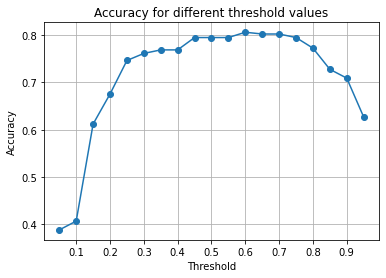

In [68]:
plt.plot(range(accuracy_list.shape[0]), accuracy_list, 'o-', label='Accuracy')
plt.title('Accuracy for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.xticks([i for i in range(1, accuracy_list.shape[0], 2)], 
           np.round(threshold_list[1::2], 1))
plt.grid()
plt.show();

In [ ]:
#porownanie logistycznej regresjii z innymi klasyfikatorami = na ten moment uznajmy, ze znamy ich tylko nazwy

In [114]:
MLA = [logreg, 
       ensemble.RandomForestClassifier(),

       tree.DecisionTreeClassifier(),
       XGBClassifier(),
       AdaBoostClassifier(),
       GradientBoostingClassifier()
    ]

In [115]:
def compare_algorithms2df(MLA, X_train, X_test, y_train, y_test, sorted_by_measure='accuracy'):
  #show grid with compared results - accuracy, recall, ppv, f1-measure, mcc
  
  MLA_columns = []
  MLA_compare = pd.DataFrame(columns = MLA_columns)


  row_index = 0
  for alg in MLA:

    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(X_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    MLA_compare.loc[row_index, 'MLA Precission'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)
    row_index+=1
  
  MLA_compare.sort_values(by = ['MLA AUC'], ascending = False, inplace = True)    
  return MLA_compare


def roc_curve_MLA(MLA,X_train, X_test, y_train, y_test):
  index = 1
  for alg in MLA:


      predicted = alg.fit(X_train, y_train).predict(X_test)
      fp, tp, th = roc_curve(y_test, predicted)
      roc_auc_mla = auc(fp, tp)
      MLA_name = alg.__class__.__name__
      plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla))

      index+=1

  plt.title('ROC Curve comparison')
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.plot([0,1],[0,1],'r--')
  plt.xlim([0,1])
  plt.ylim([0,1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')    
  plt.show()

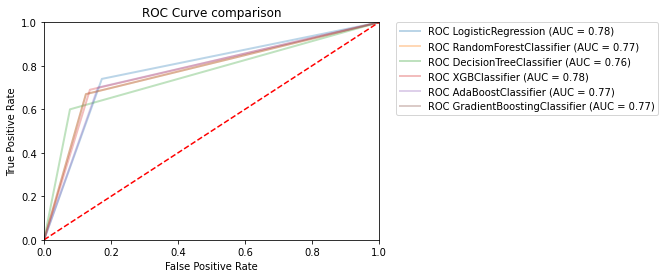

In [116]:
roc_curve_MLA(MLA,X_train, X_test, y_train, y_test)

In [117]:
df_ml = compare_algorithms2df(MLA,X_train, X_test, y_train, y_test)
df_ml

,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA Precission,MLA Recall,MLA AUC
0,LogisticRegression,0.7913,0.7948,0.718447,0.74,0.783690
3,XGBClassifier,0.8138,0.7985,0.750000,0.69,0.776548
5,GradientBoostingClassifier,0.8186,0.7985,0.761364,0.67,0.772500
4,AdaBoostClassifier,0.8042,0.7873,0.721649,0.70,0.769643
1,RandomForestClassifier,0.8186,0.8022,0.821918,0.60,0.761310
2,DecisionTreeClassifier,0.8186,0.8022,0.821918,0.60,0.761310


In [ ]:
#zad2
#Korzystajac z dokumentacji
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#zrob zestawienie w jak dl_ml, tylko dla 3 zestawow regresjii logistycznej
# 1) model1: C:0.5, regularyzacja L1
# 2) model2: maksymalna liczba iteracji: 500, solver newton
# 3) model3: toleracja na blad 0.01



